In [10]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

# Load .env file
load_dotenv()

# Access the API key
api_key = os.getenv("API_KEY")

print(api_key)  


# Get the Lagos, Nigeria weather data from the API
api_k = api_key
city = "Lagos,NG"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&cnt=240&appid={api_k}"

response = requests.get(url)
data = response.json()
json_str = json.dumps(data, indent=4)
print(json_str)


889b2efc9f709e37768f7fbb10549923
{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1761490800,
            "main": {
                "temp": 302.45,
                "feels_like": 306.75,
                "temp_min": 302.45,
                "temp_max": 302.45,
                "pressure": 1009,
                "sea_level": 1009,
                "grnd_level": 1009,
                "humidity": 71,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 500,
                    "main": "Rain",
                    "description": "light rain",
                    "icon": "10d"
                }
            ],
            "clouds": {
                "all": 74
            },
            "wind": {
                "speed": 2.99,
                "deg": 215,
                "gust": 2.84
            },
            "visibility": 10000,
            "pop": 0.73,
            "rain": {
                "3h

In [11]:
#data = response.json()
#json_str = json.dumps(data,indent=4)
#print(json_str)

In [12]:
# Create a function to convert temperature from Kelvin to Celsius
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celsius(hour['main']['temp'])
        feels_like = kelvin_to_celsius(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg']
        cloudiness = hour['clouds']['all']
        rain_volume = hour.get('rain', {}).get('3h', 0)
        snow_volume = hour.get('snow', {}).get('3h', 0)

        weather_data.append({
            "DateTime": date_time,
            "Temperature": temp,
            "Feels Like_temp": feels_like,
            "Pressure(hPa)": pressure,
            "Humidity_percent": humidity,
            "Weather": weather_main,
            "Weather Description": weather_description,
            "Wind Speed": wind_speed,
            "Wind Direction": wind_direction,
            "Cloudiness": cloudiness,
            "Rain Volume(mm)": rain_volume,
            "Snow Volume(mm)": snow_volume
        })

    df = pd.DataFrame(weather_data)
else:
            print(f"Failed to get data: {response.status_code}")
df.head()


/tmp/ipykernel_34366/2991712912.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')


,DateTime,Temperature,Feels Like_temp,Pressure(hPa),Humidity_percent,Weather,Weather Description,Wind Speed,Wind Direction,Cloudiness,Rain Volume(mm),Snow Volume(mm)
0,2025-10-26 15:00:00,29.30,33.60,1009,71,Rain,light rain,2.99,215,74,0.94,0
1,2025-10-26 18:00:00,28.12,31.93,1010,77,Rain,light rain,2.42,229,67,0.81,0
2,2025-10-26 21:00:00,26.99,29.81,1011,81,Clouds,broken clouds,2.24,214,53,0.00,0
3,2025-10-27 00:00:00,25.67,26.59,1012,88,Clouds,broken clouds,1.85,234,51,0.00,0
4,2025-10-27 03:00:00,25.59,26.50,1010,88,Clouds,overcast clouds,1.79,219,97,0.00,0


In [13]:
print(json_str)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1761490800,
            "main": {
                "temp": 302.45,
                "feels_like": 306.75,
                "temp_min": 302.45,
                "temp_max": 302.45,
                "pressure": 1009,
                "sea_level": 1009,
                "grnd_level": 1009,
                "humidity": 71,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 500,
                    "main": "Rain",
                    "description": "light rain",
                    "icon": "10d"
                }
            ],
            "clouds": {
                "all": 74
            },
            "wind": {
                "speed": 2.99,
                "deg": 215,
                "gust": 2.84
            },
            "visibility": 10000,
            "pop": 0.73,
            "rain": {
                "3h": 0.94
            },
          

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temperature          40 non-null     float64
 2   Feels Like_temp      40 non-null     float64
 3   Pressure(hPa)        40 non-null     int64  
 4   Humidity_percent     40 non-null     int64  
 5   Weather              40 non-null     object 
 6   Weather Description  40 non-null     object 
 7   Wind Speed           40 non-null     float64
 8   Wind Direction       40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  Rain Volume(mm)      40 non-null     float64
 11  Snow Volume(mm)      40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


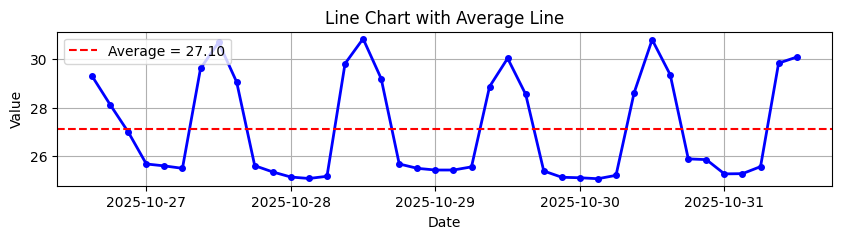

In [15]:
# Convert Datetime from Object to Datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract day and hour from Datetime
df['Day'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# Pivot the DataFrame
df_pivot = df.pivot(index='Day', columns='Hour', values='Temperature')

# Calculate average temperature
average_value = df['Temperature'].mean()

# Plot the data
plt.figure(figsize=(10, 2))
plt.plot(df['DateTime'], df['Temperature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average = {average_value:.2f}')  # Add average line
plt.title('Line Chart with Average Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')  # Add a Legend
plt.grid(True)
plt.show()




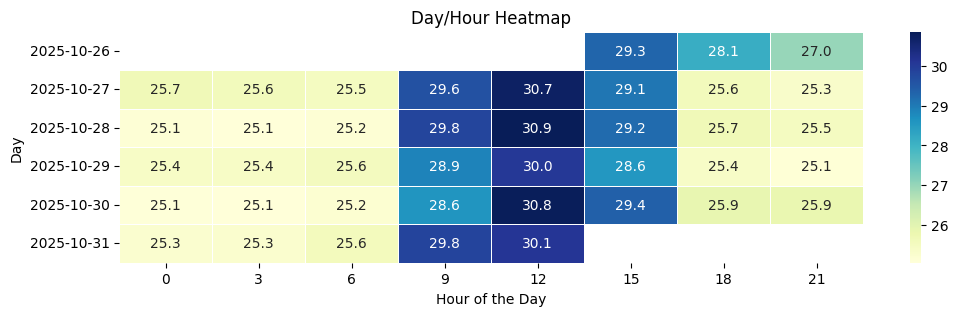

In [16]:
plt.figure(figsize=(12, 3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()


In [17]:
# Import Libraries
import pandas as pd  # For data transformation, manipulation, analysis, and cleaning.
import psycopg2  # For connecting to PostgreSQL databases and executing queries.
from sqlalchemy import create_engine  # To efficiently manage and reuse database connections


# Database Credentials
db_username = 'postgres'
db_password = 'lana'
db_host = 'localhost' 
db_port = 5432
db_name = 'postgres'

# Establish a connection using SQLAlchemy
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

# Create a table name
table_name = 'weather'

# Load the data into the table
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Close the connection
engine.dispose()

